In [1]:
# The objective of the following study is to analyse how the price of oil and gas affects the price of other 
# commodities like wheat, rice or soy among others

# I will use the pandas library to handle the data and matplotlib for visualization
# I will also use numpy for numerical operations 
# I will use seaborn for statistical data visualization
# I will use statsmodels for statistical modeling and regression analysis
# I will use the ols function from statsmodels to perform linear regression analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols
import statsmodels.api as sm
from statsmodels.iolib.summary2 import summary_col 
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score 
from sklearn.preprocessing import StandardScaler 


In [2]:
# Here I import the data from an excel file and observe the first 10 rows
comdata = pd.read_excel(r"C:/Users/User/Documents/Data projects/Commodities/Commodity_data_clean.xlsx")
comdata.head(10)

,month,crude_petro,crude_brent,crude_dubai,crude_wti,coal_aus,coal_safrica,ngas_us,ngas_eur,ngas_jp,...,aluminum,iron_ore,copper,lead,tin,nickel,zinc,gold,platinum,silver
0,1960-01-01,1.63,1.63,1.63,NaN,NaN,NaN,0.14,0.404774,NaN,...,511.471832,11.42,715.40,206.1,2180.4,1631.0,260.8,35.27,83.5,0.9137
1,1960-02-01,1.63,1.63,1.63,NaN,NaN,NaN,0.14,0.404774,NaN,...,511.471832,11.42,728.19,203.7,2180.4,1631.0,244.9,35.27,83.5,0.9137
2,1960-03-01,1.63,1.63,1.63,NaN,NaN,NaN,0.14,0.404774,NaN,...,511.471832,11.42,684.94,210.3,2173.8,1631.0,248.7,35.27,83.5,0.9137
3,1960-04-01,1.63,1.63,1.63,NaN,NaN,NaN,0.14,0.404774,NaN,...,511.471832,11.42,723.11,213.6,2178.2,1631.0,254.6,35.27,83.5,0.9137
4,1960-05-01,1.63,1.63,1.63,NaN,NaN,NaN,0.14,0.404774,NaN,...,511.471832,11.42,684.75,213.4,2162.7,1631.0,253.8,35.27,83.5,0.9137
5,1960-06-01,1.63,1.63,1.63,NaN,NaN,NaN,0.14,0.404774,NaN,...,511.471832,11.42,691.59,202.4,2184.8,1631.0,249.8,35.27,83.5,0.9137
6,1960-07-01,1.63,1.63,1.63,NaN,NaN,NaN,0.14,0.404774,NaN,...,511.471832,11.42,702.39,196.2,2248.7,1631.0,248.7,35.27,83.5,0.9137
7,1960-08-01,1.63,1.63,1.63,NaN,NaN,NaN,0.14,0.404774,NaN,...,511.471832,11.42,675.94,195.3,2204.6,1631.0,241.0,35.27,83.5,0.9137
8,1960-09-01,1.63,1.63,1.63,NaN,NaN,NaN,0.14,0.404774,NaN,...,511.471832,11.42,647.06,192.7,2226.7,1631.0,240.1,35.27,83.5,0.9137
9,1960-10-01,1.63,1.63,1.63,NaN,NaN,NaN,0.14,0.404774,NaN,...,511.471832,11.42,612.66,185.2,2226.7,1631.0,242.3,35.27,83.5,0.9137


In [3]:
# Convert 'month' to datetime
comdata['month'] = pd.to_datetime(comdata['month'])

# Set 'month' as the index
comdata = comdata.set_index('month')


In [4]:
#Let's start with some descriptive statistics
comdata.describe(include='all')

,crude_petro,crude_brent,crude_dubai,crude_wti,coal_aus,coal_safrica,ngas_us,ngas_eur,ngas_jp,inatgas,...,aluminum,iron_ore,copper,lead,tin,nickel,zinc,gold,platinum,silver
count,786.000000,786.000000,786.000000,522.000000,666.000000,498.000000,786.000000,786.000000,582.000000,582.000000,...,786.000000,786.000000,786.000000,786.000000,786.000000,786.000000,786.000000,786.000000,786.000000,786.000000
mean,33.692888,34.516762,33.054613,46.229711,58.190575,60.925672,2.409248,4.846122,7.245302,73.497891,...,1448.283174,48.675373,3344.437260,963.289486,11021.016062,9315.506418,1282.944844,600.070002,588.410320,9.586416
std,31.403278,32.565261,31.709938,28.535721,54.958594,43.518994,2.170491,6.212586,4.432631,49.849843,...,661.447213,45.750942,2707.989803,767.597378,8242.690560,7596.941761,913.804339,623.583896,457.867509,8.689378
min,1.210000,1.210000,1.210000,11.310000,7.800000,21.250000,0.140000,0.384150,2.720000,18.530831,...,496.039490,8.770000,606.710000,140.700000,2162.700000,1631.000000,176.600000,34.940000,78.500000,0.913700
25%,11.510000,11.510000,10.947500,20.742368,29.250000,30.562500,0.557500,1.735113,3.640548,40.164704,...,904.996582,21.450000,1409.257500,401.725000,4946.050000,4079.000000,687.625000,152.337500,170.032500,4.110025
50%,22.504167,23.295000,21.270000,33.332857,39.145000,46.062500,2.103750,3.090000,5.545816,54.713102,...,1457.920000,29.000000,1980.985000,605.550000,7318.150000,6648.245000,1004.350000,375.840000,430.575000,5.495600
75%,53.600000,54.972500,53.058452,69.603523,70.717500,83.811000,3.037500,5.994635,10.070819,96.521898,...,1874.990000,67.275000,5682.037500,1758.490000,16117.651000,13741.486413,1897.732636,927.552000,914.662500,15.048750
max,132.825184,133.873043,131.224783,133.927143,430.810000,302.000000,13.522619,70.043640,23.733791,454.040143,...,3577.860000,214.430000,10230.890000,3719.717000,43983.350000,52179.048000,4405.395000,3352.660000,2052.450000,42.695200


In [5]:
# I will segment the data into different timeframes to analyse the trends over time
# The data will be divided into multiple segments based on years
# The data I am using goes from 1960 to 2025, this is very long, so I will do a series of dataframes with different periods
# Some will be long term while others will be more focused on the short term
# I will first start with the current dataframe and then create other dataframes with different periods

In [6]:
# As we can see in the summary of the data above, the prices of different types of oil, are very similar, with a slight difference in the price of dubai oil, 
#which is slightly lower than the other two.
# Lots of variables have missing data for the first years, this is because the data is not available for those years, 
#so we will have to take that into account when analyzing the data
# I will start by making a long term data frame that excludes the first 20 years
comdata_long = comdata[comdata.index >= "1980-01-01"]

In [7]:
comdata_long.head(10)

,crude_petro,crude_brent,crude_dubai,crude_wti,coal_aus,coal_safrica,ngas_us,ngas_eur,ngas_jp,inatgas,...,aluminum,iron_ore,copper,lead,tin,nickel,zinc,gold,platinum,silver
month,,,,,,,,,,,,,,,,,,,,,
1980-01-01,39.000000,40.000000,38.000000,NaN,32.37,NaN,1.37,4.22,5.696227,40.557345,...,2054.860107,28.09,2601.0,1118.0,17013.0,6584.8,774.0,675.31,806.79,38.8756
1980-02-01,37.250000,38.500000,36.000000,NaN,32.37,NaN,1.42,4.22,5.696227,41.164513,...,2131.008545,28.09,2918.0,1168.0,17100.4,6978.9,870.0,665.32,882.31,35.2435
1980-03-01,37.000000,38.250000,35.750000,NaN,32.37,NaN,1.46,4.22,5.696227,41.650248,...,1978.378906,28.09,2306.0,1121.0,17470.3,6733.8,743.0,553.58,746.54,24.7300
1980-04-01,36.575001,38.150002,35.000000,NaN,39.54,NaN,1.51,4.22,5.696227,42.257417,...,1932.455566,28.09,2070.0,969.0,17017.2,6233.3,708.0,517.41,589.06,14.9487
1980-05-01,37.049999,38.500000,35.599998,NaN,40.14,NaN,1.56,4.22,5.696227,42.864586,...,1775.803711,28.09,2037.0,772.0,17041.7,6000.8,691.5,513.80,559.65,12.6761
1980-06-01,37.000000,38.000000,36.000000,NaN,40.74,NaN,1.57,4.22,5.696227,42.986019,...,1668.960449,28.09,2006.0,739.0,17223.9,6294.9,678.1,600.72,641.84,15.7834
1980-07-01,35.375000,37.400002,33.349998,NaN,40.74,NaN,1.64,4.22,5.696227,43.836056,...,1758.074951,28.09,2176.0,811.0,17090.8,6622.2,714.0,643.27,670.35,16.3220
1980-08-01,32.949999,33.599998,32.299999,NaN,44.24,NaN,1.64,4.22,5.696227,43.836056,...,1783.627197,28.09,2082.1,853.0,17018.4,6584.5,769.0,627.15,644.24,15.9418
1980-09-01,32.825001,33.400002,32.250000,NaN,44.61,NaN,1.69,4.22,5.696227,44.443224,...,1655.065674,28.09,2060.0,883.0,17308.3,6655.3,796.0,673.63,695.88,19.8868


In [8]:
# The dataframe has many colums so I am going to select the relevant ones 
#for this study
cols = [
    "crude_petro", "crude_brent", "crude_wti", "crude_dubai", "ngas_us", "ngas_eur", "ngas_jp",
    "wheat_us_hrw", "rice_05", "soybeans", "maize", "sugar_eu", "sugar_us", "coffee_arabic", "cocoa"
]
comdata_long[cols].describe()

,crude_petro,crude_brent,crude_wti,crude_dubai,ngas_us,ngas_eur,ngas_jp,wheat_us_hrw,rice_05,soybeans,maize,sugar_eu,sugar_us,coffee_arabic,cocoa
count,546.000000,546.000000,522.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000
mean,46.055009,47.215796,46.229711,45.161403,3.325474,6.561528,7.514231,196.554084,353.333388,345.439549,150.898297,0.498801,0.546857,3.175836,2.199708
std,29.904016,31.182107,28.535721,30.721969,1.998275,6.756369,4.445764,77.457118,130.455579,130.105137,63.564616,0.120402,0.130190,1.309559,1.276646
min,9.616667,9.450000,11.310000,7.850000,1.190000,1.575165,2.720000,101.780000,163.750000,183.000000,65.310000,0.295640,0.341496,1.166900,0.856900
25%,19.425000,19.762500,20.742368,17.792500,2.010000,2.820000,3.967500,144.750000,255.150000,243.000000,105.470250,0.385251,0.468663,2.372214,1.481984
50%,33.688232,35.030001,33.332857,32.475000,2.623950,4.220000,5.696227,170.120000,320.870000,302.000000,127.723790,0.484807,0.488772,3.020000,2.032890
75%,68.651128,70.508026,69.603523,68.299545,4.019875,8.290000,10.261975,230.923861,439.000000,413.835227,172.632617,0.602650,0.574744,3.714750,2.482922
max,132.825184,133.873043,133.927143,131.224783,13.522619,70.043640,23.733791,522.290000,907.000000,737.060000,348.166655,0.783171,0.985906,9.049304,10.745110


In [9]:
# We can see that in this new dataframe tha includes oil, gas and agri commodities, as from 1980, the prices of different oil types are similar
#although brent is the most expensive while dubai remains the cheapest.
# In turn gas prices are very different, with US gas being the cheapest and Japanese gas being the most expensive on average
# European gas on the other hand is cheaper than Japanese gas but more volatile as it's maximum value is by far the largest and has the 
#largest standard deviation.

Text(0.5, 1.0, 'Commodity Prices from 1980 to 2025')

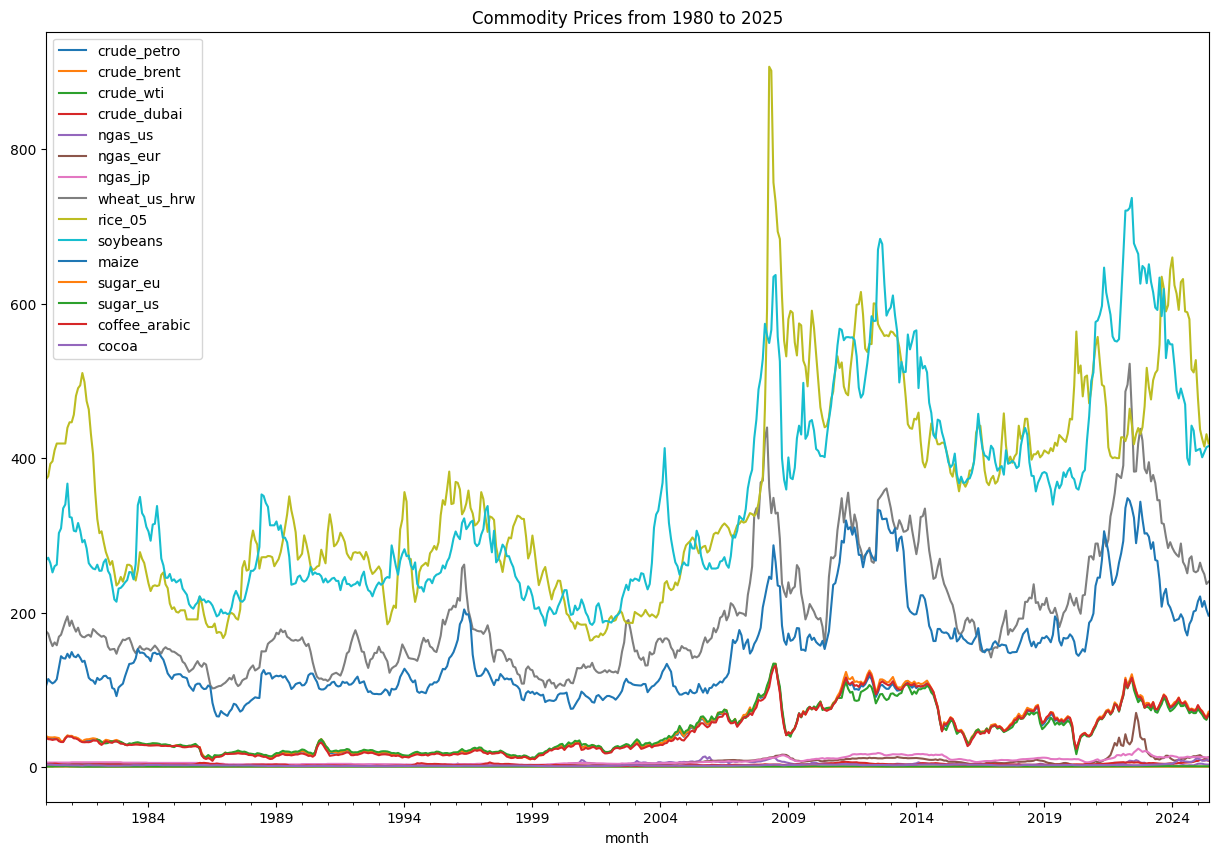

In [10]:
# I am going to plot the prices of the different oil and gas types to visualize the trends
comdata_long[cols].plot(figsize=(15, 10))
plt.title("Commodity Prices from 1980 to 2025")

Text(0.5, 1.0, 'Crude Petroleum Prices from 1980 to 2025')

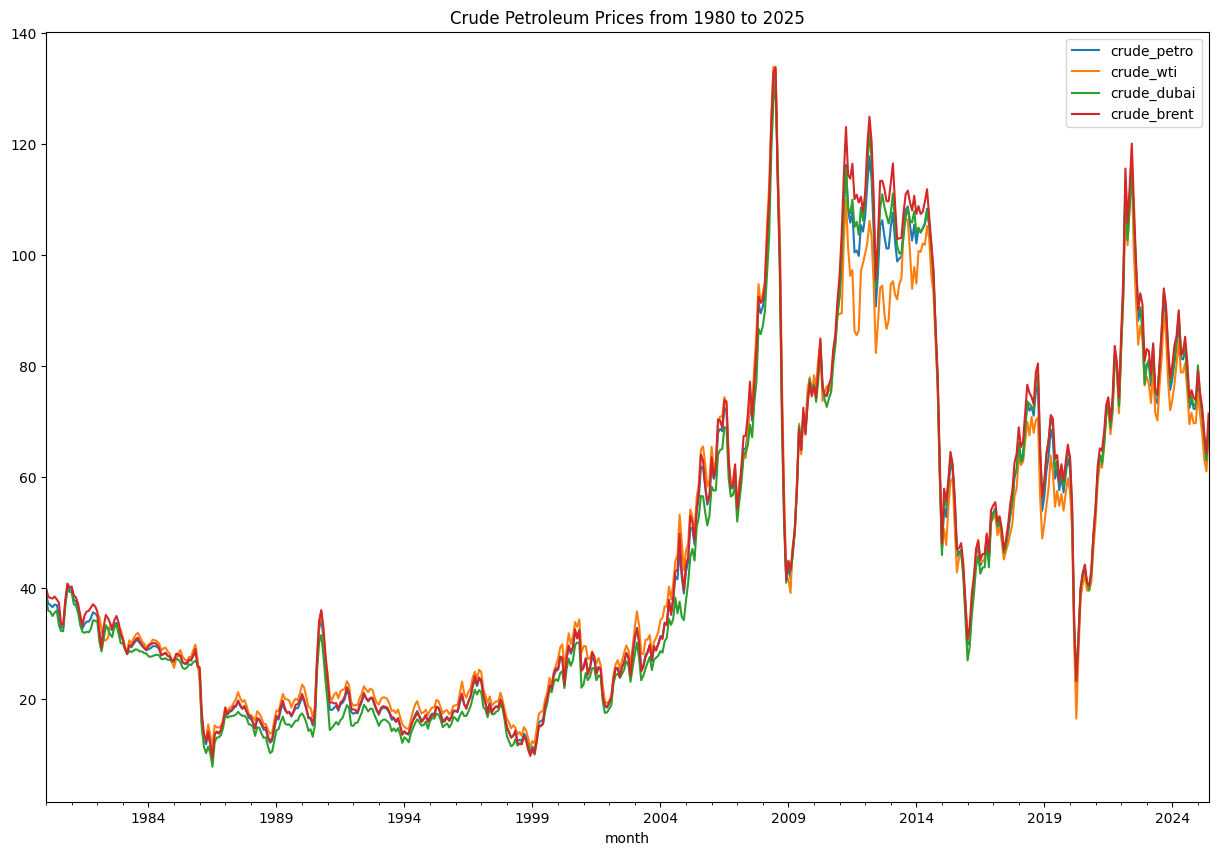

In [11]:
# Oil prices visualisation 
colscrude = [
    "crude_petro", "crude_wti", "crude_dubai", "crude_brent"]
comdata_long[colscrude].plot(figsize=(15, 10))
plt.title("Crude Petroleum Prices from 1980 to 2025")

Text(0.5, 1.0, 'Gas Prices from 1980 to 2025')

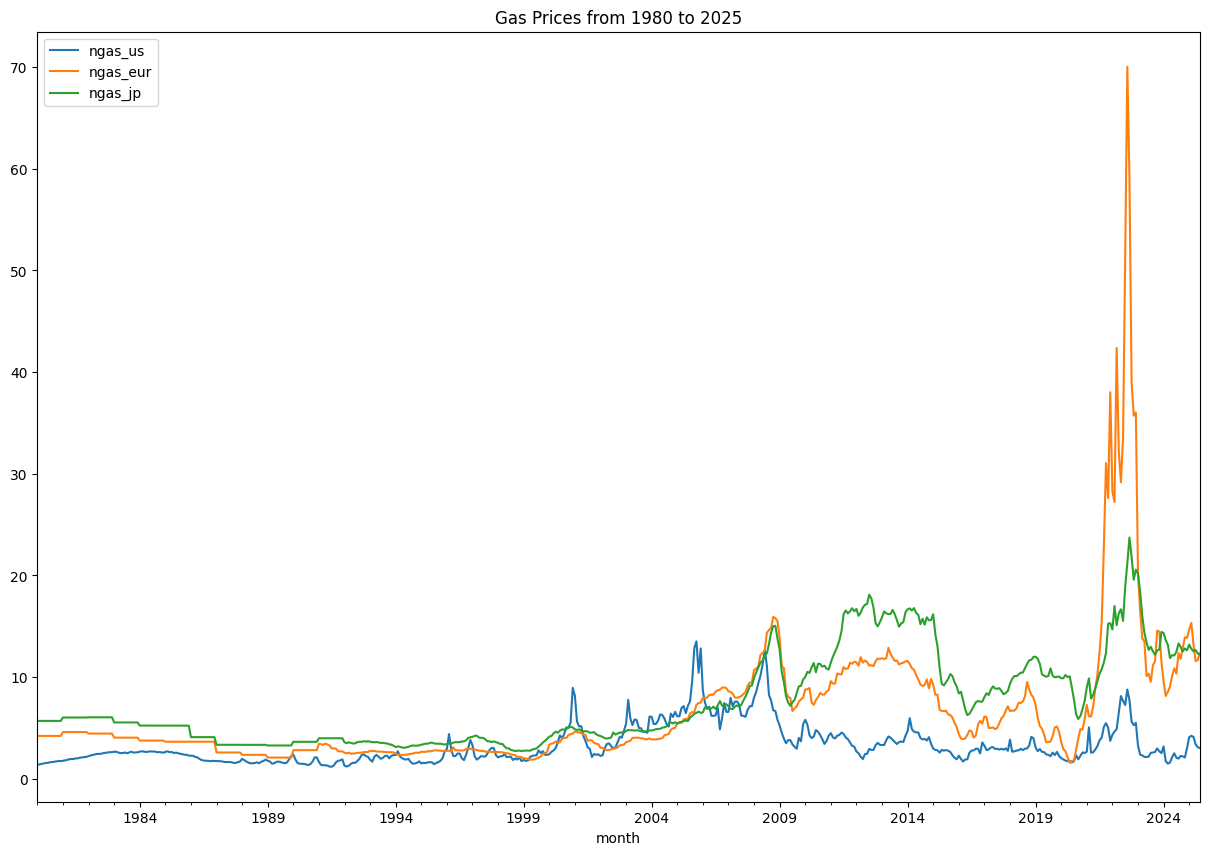

In [12]:
# Gas prices visualisation 
colsgs = [
    "ngas_us", "ngas_eur", "ngas_jp"]
comdata_long[colsgs].plot(figsize=(15, 10))
plt.title("Gas Prices from 1980 to 2025")

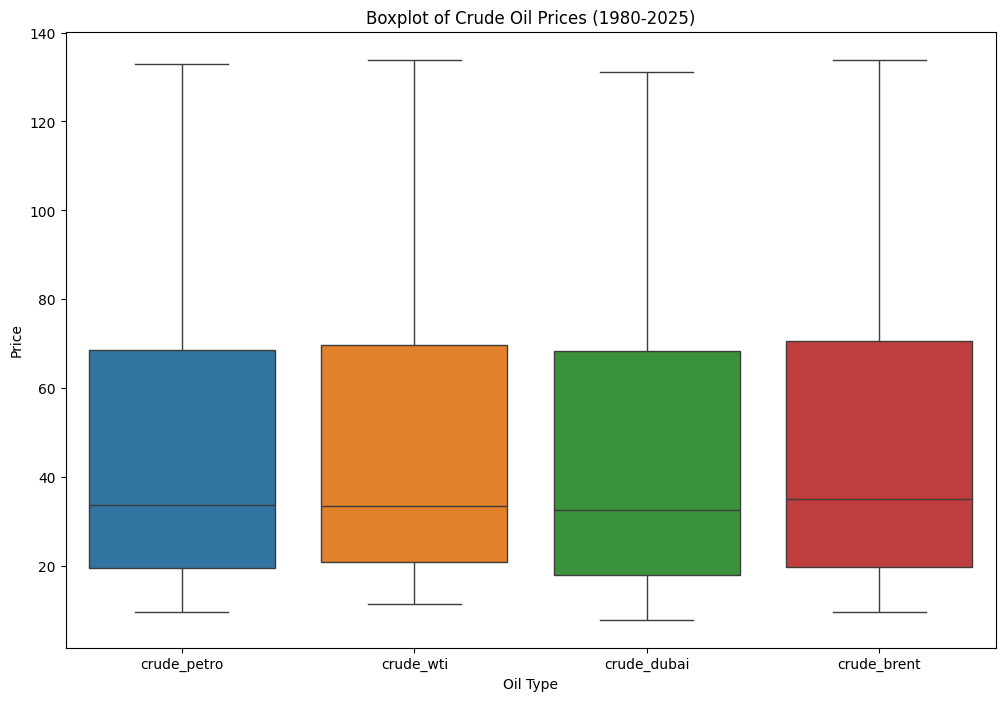

In [13]:
# Here I am goin got start with the box plots for the different oil prices
plt.figure(figsize=(12, 8))
sns.boxplot(data=comdata_long[colscrude])
plt.title("Boxplot of Crude Oil Prices (1980-2025)")
plt.ylabel("Price")
plt.xlabel("Oil Type")
plt.show()

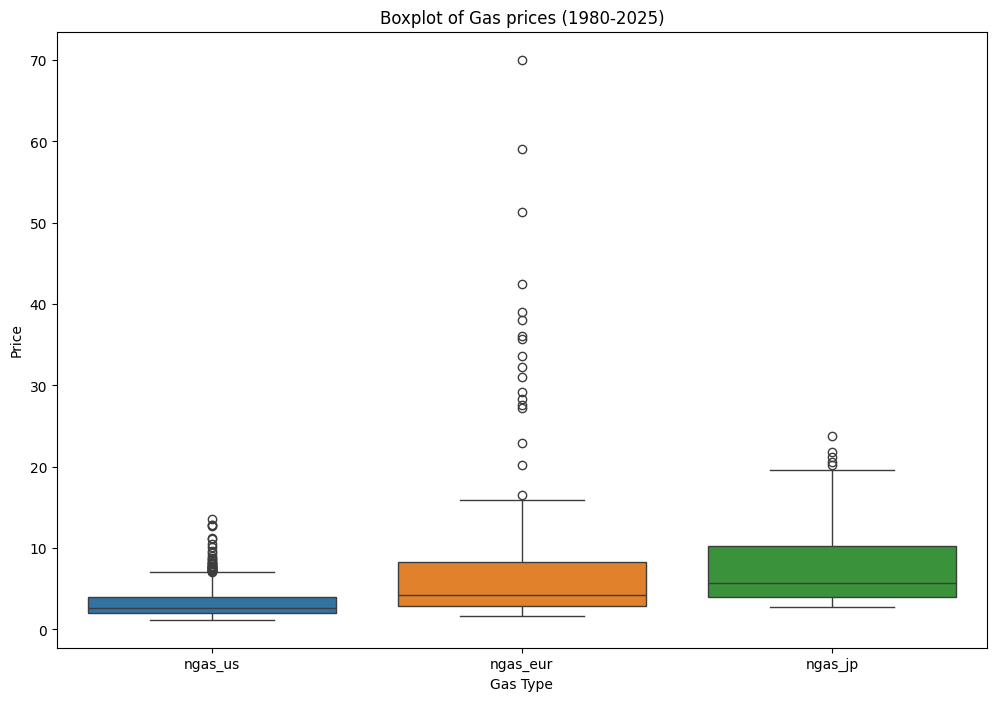

In [14]:
# Here I am going to start with the box plots for the different gas prices
plt.figure(figsize=(12, 8))
sns.boxplot(data=comdata_long[colsgs])
plt.title("Boxplot of Gas prices (1980-2025)")
plt.ylabel("Price")
plt.xlabel("Gas Type")
plt.show()

In [15]:
# The boxplots and graphs clearly show a trend among the different oil and gas types. While oil prices
#are very similar, gas prices are more volatile, for this analysis it will be interesting
#to compare the different gas prices with commodities, with the oil prices it seems only using one type 
#is enough to represent the trend of oil prices in general due to how similar they are
# Analising the effects of other oil types could be interesting for future studies, focusing on short term shocks
#on the European market for example

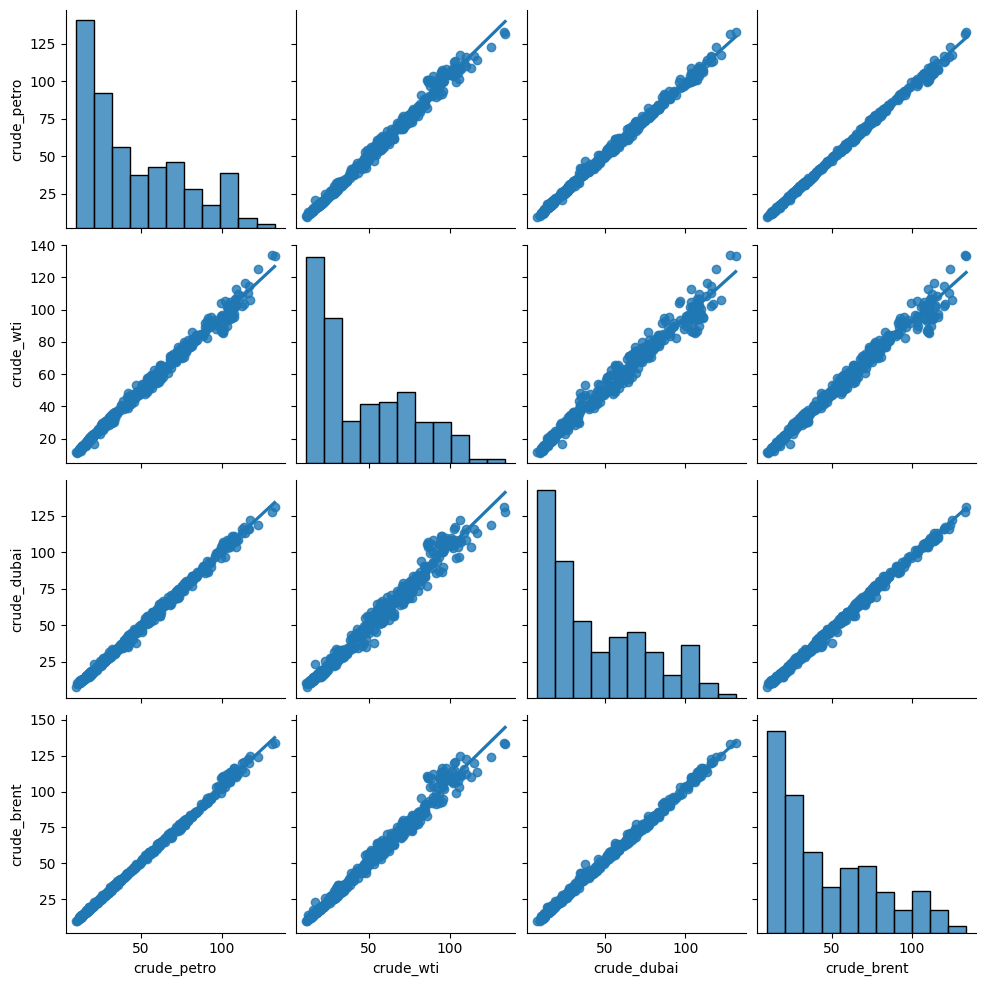

In [16]:
# I will check the pairwise correlations between the different oil prices
sns.pairplot(comdata_long[colscrude], kind='reg', height=2.5)
# As we can see they are all strongly correlated

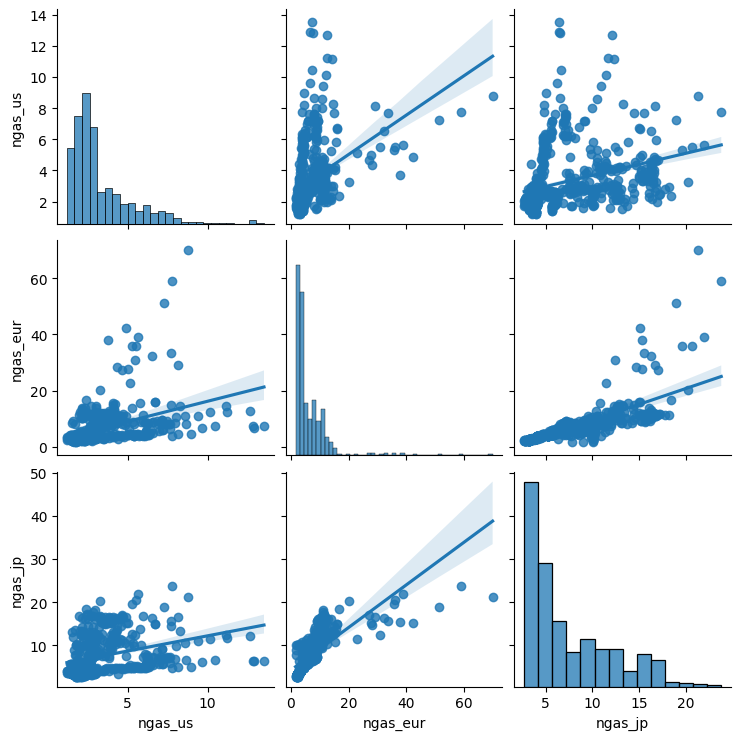

In [17]:
# Here I am checking the correlations between gas types
sns.pairplot(comdata_long[colsgs], kind='reg', height=2.5)

# The pairwise correlations show that gas prices are also correlated, but not as strongly as oil prices
# This is expected as gas prices are more volatile and have different trends depending on the region

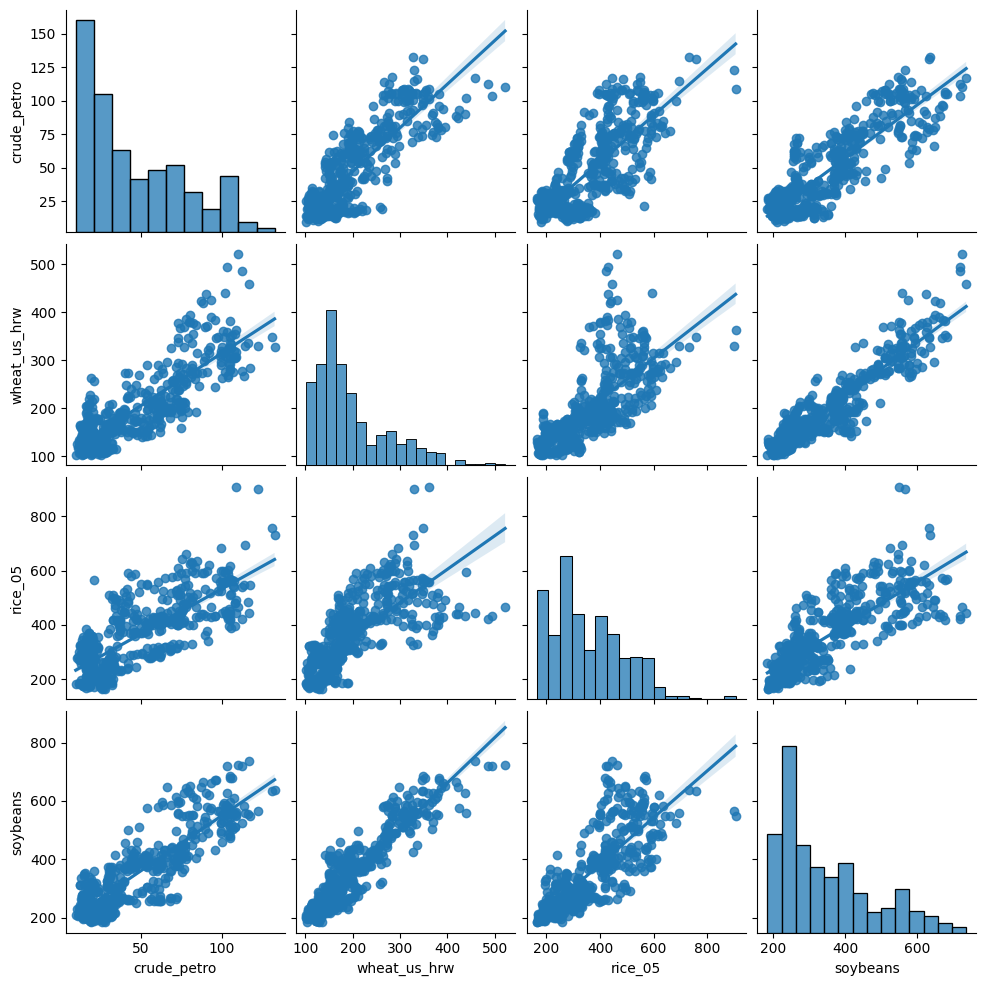

In [18]:
# Now let's check correlation between different oil types and cereals
sns.pairplot(comdata_long[["crude_petro"] + ["wheat_us_hrw"] + ["rice_05"] + ["soybeans"]], kind='reg', height=2.5)

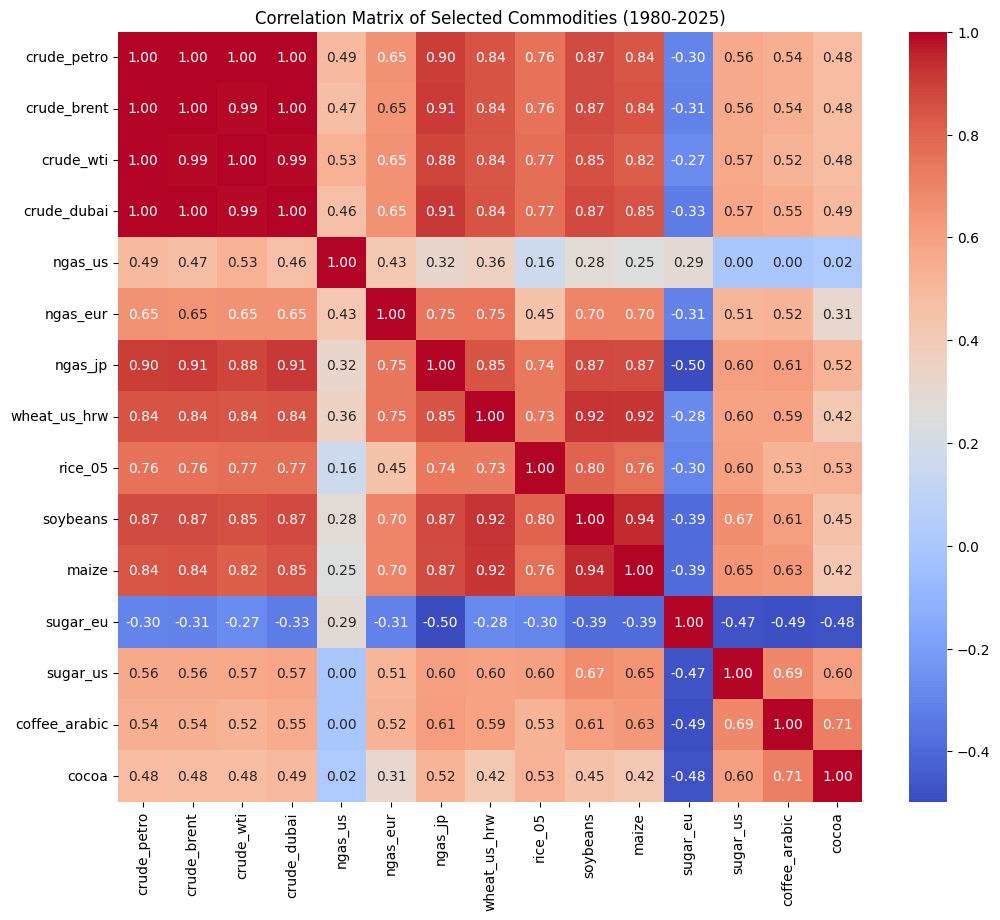

In [19]:
# We are using lots of different commodities so let's calculate the correlation matrix for selected columns
corr_matrix = comdata_long[cols].corr()

# Display the correlation matrix as a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Selected Commodities (1980-2025)")
plt.show()
# Most of the commodities are correlated with each other, with some exceptions in particular sugar in Europe and natural gas in the US
# This matrix is useful as it informs us which relations should be analysed further
# The next step is to develop a regression model to analyse the effects of oil and gas prices

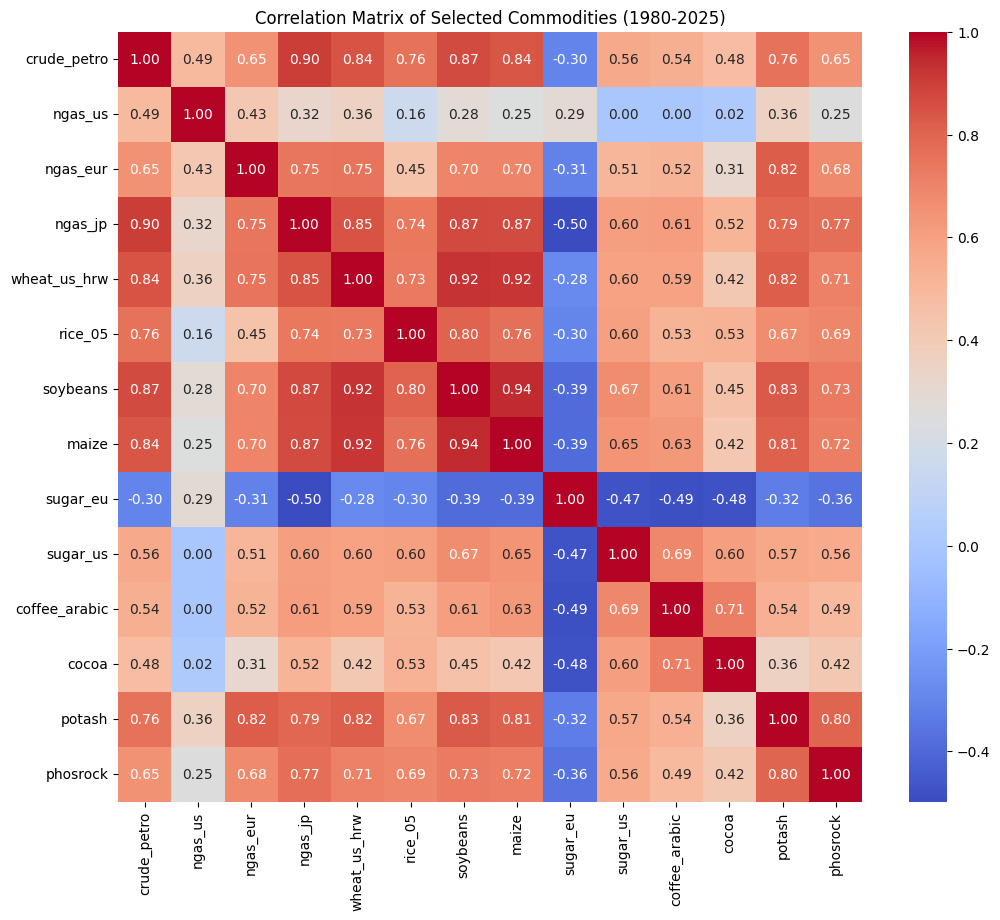

In [20]:
# Due to the strong correlation between the different oil prices, I will only include crude oil average as a representative of oil prices
# Instead I will include phosphate rock and potassium chloride as they are important fertilizers 
cols = [
    "crude_petro", "ngas_us", "ngas_eur", "ngas_jp","wheat_us_hrw", "rice_05", "soybeans", 
    "maize", "sugar_eu", "sugar_us", "coffee_arabic", "cocoa", "potash", "phosrock"
]
corr_matrix = comdata_long[cols].corr()

# Display the correlation matrix as a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Selected Commodities (1980-2025)")
plt.show()


In [21]:
## OLS SIMPLE LINEAR REGRESSION 
###############################

In [22]:
## First linear regression using this data, let's start with crude oil and wheat
petrowheat = ols("wheat_us_hrw ~ crude_petro", data=comdata_long).fit()
print(petrowheat.summary())

                            OLS Regression Results                            
Dep. Variable:           wheat_us_hrw   R-squared:                       0.711
Model:                            OLS   Adj. R-squared:                  0.711
Method:                 Least Squares   F-statistic:                     1340.
Date:                Wed, 04 Feb 2026   Prob (F-statistic):          7.36e-149
Time:                        01:35:01   Log-Likelihood:                -2810.1
No. Observations:                 546   AIC:                             5624.
Df Residuals:                     544   BIC:                             5633.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      95.9486      3.276     29.289      

<Axes: xlabel='wheat_us_hrw', ylabel='crude_petro'>

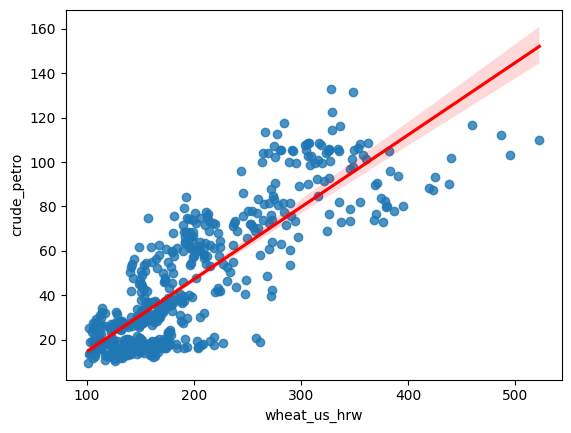

In [23]:
# Let's see the regplot of the regression
sns.regplot(x="wheat_us_hrw", y="crude_petro", data=comdata_long, line_kws={"color": "red"})

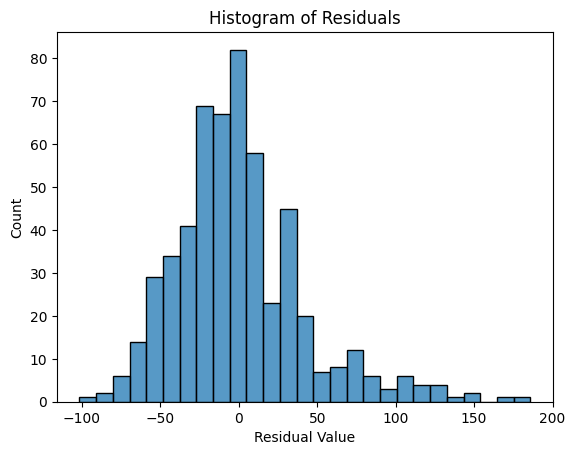

In [24]:
# Now check for the residuals of the regression 
residuals = petrowheat.resid
fig = sns.histplot(residuals)
fig.set_xlabel("Residual Value")
fig.set_title("Histogram of Residuals")
plt.show()
# The residuals show a normal distribution, which is a good sign for the regression model 

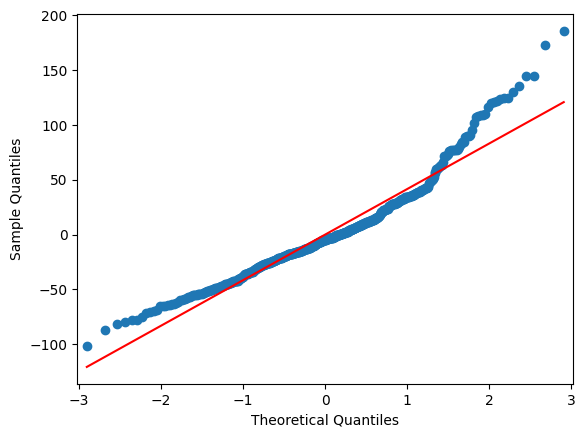

In [25]:
# When checking the QQ plot of the residuals, we can see that they follow a mostly normal distribution 
fig = sm.qqplot(petrowheat.resid, line = 's')
plt.show()

Text(0.5, 1.0, 'Actual vs Predicted Wheat Prices (1980-2025)')

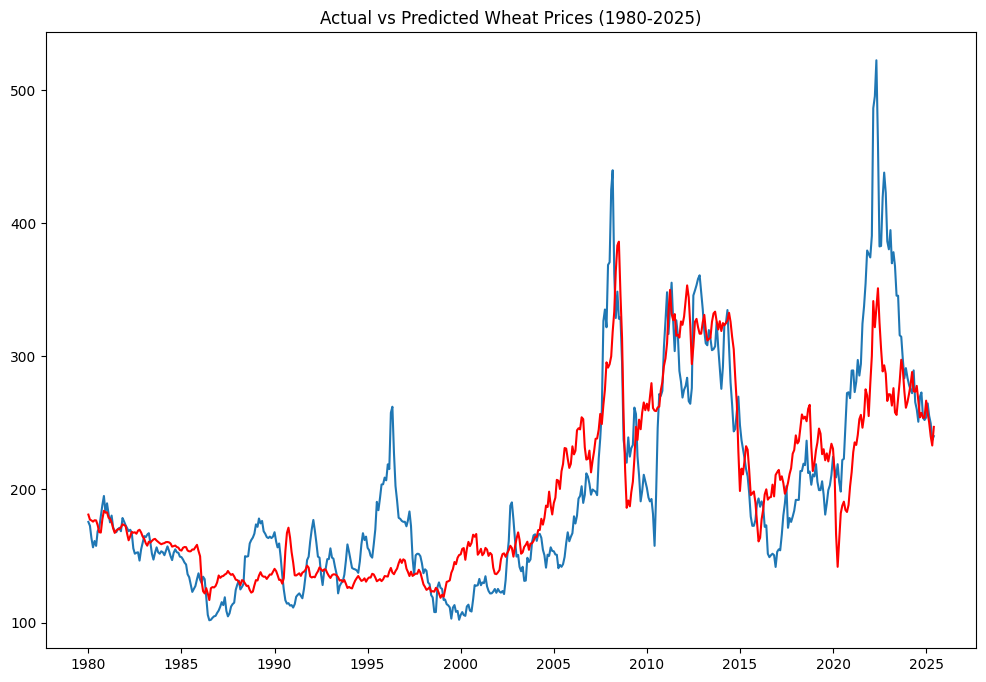

In [26]:
# Now let's check the predictions of the model
# We will plot the actual wheat prices and the predicted wheat prices 
fitted_values = petrowheat.predict(comdata_long[["crude_petro"]])
plt.figure(figsize=(12, 8))
plt.plot(comdata_long.index, comdata_long["wheat_us_hrw"], label="Actual Wheat Prices")
plt.plot(comdata_long.index, fitted_values, label="Predicted Wheat Prices", color='red')
plt.title("Actual vs Predicted Wheat Prices (1980-2025)")

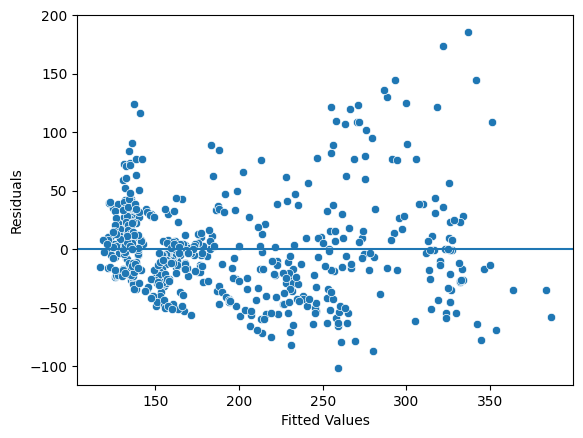

In [27]:
# Checking the homoscedasticity of the residuals
# We will plot the residuals against the fitted values (predictions)
fig = sns.scatterplot(x=fitted_values, y=residuals)

# Add reference line at residuals = 0 and add labels 
fig.axhline(0)
fig.set_xlabel("Fitted Values")
fig.set_ylabel("Residuals")
plt.show()
# The residuals are mostly randomly distributed around 0, which is a good sign for the regression model, but there is some clustering
# This could be due to the fact that we are using a simple linear regression model, which may not capture all the complexities of the data 

In [28]:
## Let's check for WTI instead of petro 
wtiwheat = ols("wheat_us_hrw ~ crude_wti", data=comdata_long).fit()
print(wtiwheat.summary())

                            OLS Regression Results                            
Dep. Variable:           wheat_us_hrw   R-squared:                       0.700
Model:                            OLS   Adj. R-squared:                  0.700
Method:                 Least Squares   F-statistic:                     1215.
Date:                Wed, 04 Feb 2026   Prob (F-statistic):          3.62e-138
Time:                        01:35:04   Log-Likelihood:                -2706.8
No. Observations:                 522   AIC:                             5418.
Df Residuals:                     520   BIC:                             5426.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     90.4434      3.612     25.043      0.0

In [29]:
# OLS regressions for wheat prices against different oil, gas and fertilizer prices 
petrowheat = ols("wheat_us_hrw ~ crude_petro", data=comdata_long).fit()
gas_us_wheat = ols("wheat_us_hrw ~ ngas_us", data=comdata_long).fit() 
gas_eu_wheat = ols("wheat_us_hrw ~ ngas_eur", data=comdata_long).fit()
gas_jp_wheat = ols("wheat_us_hrw ~ ngas_jp", data=comdata_long).fit()
pot_wheat = ols("wheat_us_hrw ~ potash", data=comdata_long).fit()
phos_wheat = ols("wheat_us_hrw ~ phosrock", data=comdata_long).fit()


# Create a summary table
results_wheat = summary_col([petrowheat, gas_us_wheat, gas_eu_wheat, gas_jp_wheat, pot_wheat, phos_wheat],
                            stars=True,
                            model_names=["Petro OLS", "Gas US OLS", "Gas EU OLS", "Gas JP OLS", "Potash OLS", "Phosphate OLS"],
                            info_dict={'R-squared': lambda x: f"{x.rsquared:.2f}" if hasattr(x, "rsquared") else "N/A",
                                       'No. observations': lambda x: f"{int(x.nobs)}"})

print(results_wheat)


                 Petro OLS   Gas US OLS  Gas EU OLS Gas JP OLS  Potash OLS Phosphate OLS
----------------------------------------------------------------------------------------
Intercept        95.9486*** 150.5860*** 140.0137*** 85.6825*** 119.0745*** 138.4646***  
                 (3.2759)   (6.0223)    (3.0520)    (3.4674)   (3.0352)    (3.4150)     
crude_petro      2.1845***                                                              
                 (0.0597)                                                               
ngas_us                     13.8230***                                                  
                            (1.5526)                                                    
ngas_eur                                8.6170***                                       
                                        (0.3242)                                        
ngas_jp                                             14.7549***                          
                    

In [30]:
# The summary table above shows the results of the regression models for wheat prices against different oil, gas and fertilizer prices
# The R-squared values indicate the proportion of variance in wheat prices explained by each model
# The Petro OLS model has the highest R-squared value, indicating that it explains the most variance in wheat prices
# The Gas US OLS model has the second highest R-squared value, followed by the Gas EU OLS and Gas JP OLS models
# The Potash OLS and Phosphate OLS models have the lowest R-squared values
# The results suggest that oil prices have a significant impact on wheat prices, while gas prices and fertilizer prices have a smaller impact
# This is consistent with the economic theory that oil prices affect the cost of production and transportation of agricultural commodities
# Nevertheless, gas prices in the US has a low R-squared value, indicating that it does not explain much of the variance in wheat prices
#this could be explained by the fact that US gas prices are lower and less volatily than European and Japanese gas prices

In [31]:
# OLS regressions for rice prices against different oil, gas and fertilizer prices 
petrorice = ols("rice_05 ~ crude_petro", data=comdata_long).fit()
gas_us_rice = ols("rice_05 ~ ngas_us", data=comdata_long).fit() 
gas_eu_rice = ols("rice_05 ~ ngas_eur", data=comdata_long).fit()
gas_jp_rice = ols("rice_05 ~ ngas_jp", data=comdata_long).fit()
pot_rice = ols("rice_05 ~ potash", data=comdata_long).fit()
phos_rice = ols("rice_05 ~ phosrock", data=comdata_long).fit()


# Create a summary table
results_rice = summary_col([petrorice, gas_us_rice, gas_eu_rice, gas_jp_rice, pot_rice, phos_rice],
                            stars=True,
                            model_names=["Petro OLS", "Gas US OLS", "Gas EU OLS", "Gas JP OLS", "Potash OLS", "Phosphate OLS"],
                            info_dict={'R-squared': lambda x: f"{x.rsquared:.2f}" if hasattr(x, "rsquared") else "N/A",
                                       'No. observations': lambda x: f"{int(x.nobs)}"})

print(results_rice)


                  Petro OLS   Gas US OLS  Gas EU OLS  Gas JP OLS  Potash OLS Phosphate OLS
------------------------------------------------------------------------------------------
Intercept        200.7837*** 317.7165*** 296.6210*** 189.8993*** 246.1562*** 257.7945***  
                 (6.6820)    (10.7096)   (6.9688)    (7.3718)    (6.5640)    (5.8711)     
crude_petro      3.3123***                                                                
                 (0.1217)                                                                 
ngas_us                      10.7103***                                                   
                             (2.7611)                                                     
ngas_eur                                 8.6432***                                        
                                         (0.7403)                                         
ngas_jp                                              21.7499***                          

In [32]:
# The above summary table shows the results of the regression models for rice prices against different oil, gas and fertilizer prices
# Once more all the models show a significant relationship between the prices of oil, gas and fertilizers and rice prices
# Oil prices also have a strong effect on rice prices, with the Petro OLS model having the highest R-squared value
# But this time Japanese gas prices have a higher R-squared value than European gas prices, indicating that they explain more of the variance in rice prices
# This could be due to the fact that Japan is a major importer of rice and its gas prices are more closely linked to rice prices

In [33]:
# SOYBEANS REGRESSION
# OLS regressions for soybeans against different oil, gas and fertilizer prices 
petrosoy = ols("soybeans ~ crude_petro", data=comdata_long).fit()
gas_us_soy = ols("soybeans ~ ngas_us", data=comdata_long).fit() 
gas_eu_soy = ols("soybeans ~ ngas_eur", data=comdata_long).fit()
gas_jp_soy = ols("soybeans ~ ngas_jp", data=comdata_long).fit()
pot_soy = ols("soybeans ~ potash", data=comdata_long).fit()
phos_soy = ols("soybeans ~ phosrock", data=comdata_long).fit()


# Create a summary table
results_soy = summary_col([petrosoy, gas_us_soy, gas_eu_soy, gas_jp_soy, pot_soy, phos_soy],
                            stars=True,
                            model_names=["Petro OLS", "Gas US OLS", "Gas EU OLS", "Gas JP OLS", "Potash OLS", "Phosphate OLS"],
                            info_dict={'R-squared': lambda x: f"{x.rsquared:.2f}" if hasattr(x, "rsquared") else "N/A",
                                       'No. observations': lambda x: f"{int(x.nobs)}"})

print(results_soy)


                  Petro OLS   Gas US OLS  Gas EU OLS  Gas JP OLS  Potash OLS Phosphate OLS
------------------------------------------------------------------------------------------
Intercept        171.8787*** 283.8259*** 257.1774*** 153.7309*** 213.5615*** 245.0849***  
                 (5.1174)    (10.3799)   (5.5616)    (5.3654)    (4.9600)    (5.5599)     
crude_petro      3.7686***                                                                
                 (0.0932)                                                                 
ngas_us                      18.5278***                                                   
                             (2.6761)                                                     
ngas_eur                                 13.4515***                                       
                                         (0.5908)                                         
ngas_jp                                              25.5127***                          

In [34]:
# The above summary table shows the results of the regression models for rice prices against different oil, gas and fertilizer prices
# Crude oil has a strong effect on rice prices, with the Petro OLS model having the highest R-squared value
# All the models show a significant relationship between the prices of oil, gas and fertilizers and rice prices
# The results suggest that oil prices have a significant impact on rice prices, while gas prices and fertilizer prices have a smaller impact
# This is consistent with the economic theory that oil prices affect the cost of production and transportation of agricultural commodities

In [35]:
## MULTIVARIATE ANALYSIS 
########################

In [36]:
## For the next regression let's include the natural gas prices in the regression model 
oil_gas_wheat = ols("wheat_us_hrw ~ crude_petro + ngas_us", data=comdata_long).fit()
print(oil_gas_wheat.summary())

                            OLS Regression Results                            
Dep. Variable:           wheat_us_hrw   R-squared:                       0.715
Model:                            OLS   Adj. R-squared:                  0.714
Method:                 Least Squares   F-statistic:                     681.3
Date:                Wed, 04 Feb 2026   Prob (F-statistic):          9.37e-149
Time:                        01:35:05   Log-Likelihood:                -2806.5
No. Observations:                 546   AIC:                             5619.
Df Residuals:                     543   BIC:                             5632.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     100.9407      3.750     26.918      

In [37]:
# In this regression we can see that the gas prices have a significant effect on the wheat prices, but have a negative coefficient, 
#meaning that when gas prices go up, wheat prices go down
# This is an interesting result, as it shows that gas prices have a negative effect on wheat prices, which is not what we would expect
# We will further analyse this relationship in the following sections 

In [38]:
# Multivariate OLS with all variables
all_wheat = ols("wheat_us_hrw ~ crude_petro + ngas_us + ngas_eur + ngas_jp + potash + phosrock", data=comdata_long).fit()
all_rice = ols("rice_05 ~ crude_petro + ngas_us + ngas_eur + ngas_jp + potash + phosrock", data=comdata_long).fit()
all_soy = ols("soybeans ~ crude_petro + ngas_us + ngas_eur + ngas_jp + potash + phosrock", data=comdata_long).fit()
all_maize = ols("maize ~ crude_petro + ngas_us + ngas_eur + ngas_jp + potash + phosrock", data=comdata_long).fit()
all_sugar_eu = ols("sugar_eu ~ crude_petro + ngas_us + ngas_eur + ngas_jp + potash + phosrock", data=comdata_long).fit()
all_sugar_us = ols("sugar_us ~ crude_petro + ngas_us + ngas_eur + ngas_jp + potash + phosrock", data=comdata_long).fit()
all_coffee = ols("coffee_arabic ~ crude_petro + ngas_us + ngas_eur + ngas_jp + potash + phosrock", data=comdata_long).fit()
all_cocoa = ols("cocoa ~ crude_petro + ngas_us + ngas_eur + ngas_jp + potash + phosrock", data=comdata_long).fit()

# Create a summary table
results_all = summary_col([all_wheat, all_rice, all_soy, all_maize, all_sugar_eu, all_sugar_us, all_coffee, all_cocoa],
                            stars=True,
                            model_names=["Wheat", "Rice", "Soybeans", "Maize", "Sugar EU", "Sugar US", "Coffee", "Cocoa"],
                            info_dict={'R-squared': lambda x: f"{x.rsquared:.2f}" if hasattr(x, "rsquared") else "N/A",
                                       'No. observations': lambda x: f"{int(x.nobs)}"})

print(results_all)



                    Wheat        Rice      Soybeans    Maize     Sugar EU   Sugar US    Coffee     Cocoa   
-----------------------------------------------------------------------------------------------------------
Intercept        100.8449*** 220.5867*** 183.7388*** 74.8780*** 0.5439***  0.4914***  2.4748***  1.4849*** 
                 (3.9425)    (7.9555)    (5.8829)    (3.1370)   (0.0100)   (0.0106)   (0.1118)   (0.1217)  
crude_petro      1.3631***   3.0775***   2.4146***   1.0101***  0.0015***  0.0027***  0.0158***  0.0203*** 
                 (0.1506)    (0.3040)    (0.2248)    (0.1199)   (0.0004)   (0.0004)   (0.0043)   (0.0046)  
ngas_us          -3.4511***  -12.7862*** -10.1855*** -5.8923*** 0.0254***  -0.0267*** -0.2351*** -0.1596***
                 (0.9861)    (1.9899)    (1.4715)    (0.7846)   (0.0025)   (0.0027)   (0.0280)   (0.0304)  
ngas_eur         2.5359***   -6.2019***  0.6035      0.7331**   -0.0006    0.0053***  0.0627***  0.0089    
                 (0.4467)  

In [39]:
# The above table shows the results of the multivariate regression models including all variables 
# Based on the results above we will proceed to exclude variables using the backward elimination method
# After eliminating the variables we check the results of the new models and compare them with the previous ones 

In [40]:
# Multivariate OLS with backward elimination 
all_wheat = ols("wheat_us_hrw ~ crude_petro + ngas_us + ngas_eur + potash", data=comdata_long).fit()
all_rice = ols("rice_05 ~ crude_petro + ngas_us + ngas_eur + potash + phosrock", data=comdata_long).fit()
all_soy = ols("soybeans ~ crude_petro + ngas_us + ngas_jp + potash + phosrock", data=comdata_long).fit()
all_maize = ols("maize ~ crude_petro + ngas_us + ngas_eur + ngas_jp + potash", data=comdata_long).fit()
all_sugar_eu = ols("sugar_eu ~ crude_petro + ngas_us + ngas_jp", data=comdata_long).fit()
all_sugar_us = ols("sugar_us ~ crude_petro + ngas_us + ngas_eur + ngas_jp + phosrock", data=comdata_long).fit()
all_coffee = ols("coffee_arabic ~ crude_petro + ngas_us + ngas_eur", data=comdata_long).fit()
all_cocoa = ols("cocoa ~ crude_petro + ngas_us + potash + phosrock", data=comdata_long).fit()

# Create a summary table
results_all = summary_col([all_wheat, all_rice, all_soy, all_maize, all_sugar_eu, all_sugar_us, all_coffee, all_cocoa],
                            stars=True,
                            model_names=["Wheat", "Rice", "Soybeans", "Maize", "Sugar EU", "Sugar US", "Coffee", "Cocoa"],
                            info_dict={'R-squared': lambda x: f"{x.rsquared:.2f}" if hasattr(x, "rsquared") else "N/A",
                                       'No. observations': lambda x: f"{int(x.nobs)}"})

print(results_all)



                    Wheat        Rice      Soybeans    Maize     Sugar EU   Sugar US    Coffee     Cocoa   
-----------------------------------------------------------------------------------------------------------
Intercept        102.6348*** 217.3105*** 181.5399*** 74.1061*** 0.5427***  0.4922***  2.5744***  1.5566*** 
                 (3.1600)    (6.3904)    (5.3573)    (3.0687)   (0.0088)   (0.0104)   (0.0883)   (0.0962)  
crude_petro      1.4570***   2.9003***   2.3328***   0.9665***  0.0014***  0.0028***  0.0212***  0.0255*** 
                 (0.0802)    (0.1638)    (0.2058)    (0.1142)   (0.0003)   (0.0004)   (0.0019)   (0.0025)  
ngas_us          -3.9224***  -12.1456*** -9.6408***  -5.7795*** 0.0253***  -0.0269*** -0.2558*** -0.1694***
                 (0.8648)    (1.7606)    (1.3426)    (0.7788)   (0.0022)   (0.0026)   (0.0241)   (0.0262)  
ngas_eur         2.7199***   -6.4914***              0.6699*               0.0055***  0.0726***            
                 (0.3937)  

In [41]:
## LAGGED REGRESSION
####################

In [42]:
# Lagged regression for wheat prices with 1 month lag
# Lagged variables (1 month lag)
comdata_long["wheat_us_hrw_lag1"] = comdata_long["wheat_us_hrw"].shift(1)
comdata_long["crude_petro_lag1"] = comdata_long["crude_petro"].shift(1)
comdata_long["ngas_us_lag1"] = comdata_long["ngas_us"].shift(1)

# Drop rows with NaN values caused by lagging
lagged_data = comdata_long.dropna(subset=["wheat_us_hrw_lag1", "crude_petro_lag1", "ngas_us_lag1", "wheat_us_hrw"])

# Fit lagged regression model including lagged dependent variable
lagged_model = ols("wheat_us_hrw ~ wheat_us_hrw_lag1 + crude_petro_lag1 + ngas_us_lag1", data=lagged_data).fit()
lagged_model2 = ols("wheat_us_hrw ~ wheat_us_hrw_lag1 + crude_petro_lag1 + ngas_us", data=lagged_data).fit()

# Create a summary table
results_all = summary_col([lagged_model, lagged_model2],
                            stars=True,
                            model_names=["Model 1", "Model 2"],
                            info_dict={'R-squared': lambda x: f"{x.rsquared:.2f}" if hasattr(x, "rsquared") else "N/A",
                                       'No. observations': lambda x: f"{int(x.nobs)}"})
print(results_all)



                   Model 1   Model 2 
-------------------------------------
Intercept         4.5368**  4.0687** 
                  (1.9607)  (1.9591) 
wheat_us_hrw_lag1 0.9629*** 0.9639***
                  (0.0147)  (0.0147) 
crude_petro_lag1  0.0632    0.0545   
                  (0.0407)  (0.0405) 
ngas_us_lag1      -0.0123            
                  (0.3502)           
ngas_us                     0.1921   
                            (0.3489) 
R-squared         0.9668    0.9668   
R-squared Adj.    0.9666    0.9666   
No. observations  545       545      
R-squared         0.97      0.97     
Standard errors in parentheses.
* p<.1, ** p<.05, ***p<.01


C:\Users\User\AppData\Local\Temp\ipykernel_26344\335244585.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comdata_long["wheat_us_hrw_lag1"] = comdata_long["wheat_us_hrw"].shift(1)
C:\Users\User\AppData\Local\Temp\ipykernel_26344\335244585.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comdata_long["crude_petro_lag1"] = comdata_long["crude_petro"].shift(1)
C:\Users\User\AppData\Local\Temp\ipykernel_26344\335244585.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from 

In [43]:
# Here we can see that the price of wheat today is strongly correlated with the price of wheat last month, but on the other hand
#it is not strongly related with the price of oil or gas, which is an interesting result
# This suggests that the price of wheat is more influenced by its own past prices than by the prices of oil or gas last month
# In the second model we included the current price of gas instead of the lagged price, which shows that the current price of gas
#but the current price is also not statistically significant, which suggests that the price of gas does not have a strong effect on the price of wheat
# Let's try and see if by lagging the prices by more than one month we can see a stronger relationship 

In [44]:
# Lagged regression for wheat prices with 2 month lag
# Lagged variables (2 month lag)
comdata_long["wheat_us_hrw_lag1"] = comdata_long["wheat_us_hrw"].shift(1)
comdata_long["crude_petro_lag2"] = comdata_long["crude_petro"].shift(2)
comdata_long["ngas_us_lag1"] = comdata_long["ngas_us"].shift(1)

# Drop rows with NaN values caused by lagging
lagged_data = comdata_long.dropna(subset=["wheat_us_hrw_lag1", "crude_petro_lag2", "ngas_us_lag1", "wheat_us_hrw"])

# Fit lagged regression model including lagged dependent variable
lagged_model3 = ols("wheat_us_hrw ~ wheat_us_hrw_lag1 + crude_petro_lag2 + ngas_us_lag1", data=lagged_data).fit()
lagged_model4 = ols("wheat_us_hrw ~ wheat_us_hrw_lag1 + crude_petro_lag2 + ngas_us", data=lagged_data).fit()
lagged_model5 = ols("wheat_us_hrw ~ wheat_us_hrw_lag1 + crude_petro", data=lagged_data).fit()

# Create a summary table
results_all = summary_col([lagged_model3, lagged_model4, lagged_model5],
                            stars=True,
                            model_names=["Model 3", "Model 4", "Model 5"],
                            info_dict={'R-squared': lambda x: f"{x.rsquared:.2f}" if hasattr(x, "rsquared") else "N/A",
                                       'No. observations': lambda x: f"{int(x.nobs)}"})
print(results_all)


C:\Users\User\AppData\Local\Temp\ipykernel_26344\232681951.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comdata_long["wheat_us_hrw_lag1"] = comdata_long["wheat_us_hrw"].shift(1)
C:\Users\User\AppData\Local\Temp\ipykernel_26344\232681951.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comdata_long["crude_petro_lag2"] = comdata_long["crude_petro"].shift(2)
C:\Users\User\AppData\Local\Temp\ipykernel_26344\232681951.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from 


                   Model 3   Model 4   Model 5 
-----------------------------------------------
Intercept         4.1612**  3.7113*   5.3070***
                  (1.9433)  (1.9394)  (1.7861) 
wheat_us_hrw_lag1 0.9678*** 0.9684*** 0.9489***
                  (0.0144)  (0.0144)  (0.0146) 
crude_petro_lag2  0.0473    0.0394             
                  (0.0397)  (0.0395)           
ngas_us_lag1      0.0380                       
                  (0.3491)                     
ngas_us                     0.2408             
                            (0.3470)           
crude_petro                           0.1055***
                                      (0.0379) 
R-squared         0.9667    0.9667    0.9671   
R-squared Adj.    0.9665    0.9665    0.9669   
No. observations  544       544       544      
R-squared         0.97      0.97      0.97     
Standard errors in parentheses.
* p<.1, ** p<.05, ***p<.01


In [45]:
# Here we can see that the past prices of oil has little offect on the price of wheat but the current price of oil has a significant effect
# These results are contrary to our hypothesis that the price of oil in past months would have a significant effect on the price of wheat
# The explanation could be that the prices here are monthly averages and the prices of gasoline or jet fuel can react within days to weeks 
#to changes in the price of crude oil, in particular in highly liquid markets like the US
# It would be interesting to see if the results change if we use daily data instead of monthly averages 

In [46]:
# Lagged regression for wheat with 3 month lag
# Lagged variables (3 month lag)
comdata_long["crude_petro_lag3"] = comdata_long["crude_petro"].shift(3)

# Drop rows with NaN values caused by lagging
lagged_data = comdata_long.dropna(subset=["wheat_us_hrw_lag1", "crude_petro_lag3", "crude_petro", "wheat_us_hrw"])

# Fit lagged regression model including lagged dependent variable
lagged_model6 = ols("wheat_us_hrw ~ wheat_us_hrw_lag1 + crude_petro_lag3 + ngas_us_lag1", data=lagged_data).fit()


# Create a summary table
results_all = summary_col([lagged_model6, lagged_model5],
                            stars=True,
                            model_names=["Model 6", "Model 5"],
                            info_dict={'R-squared': lambda x: f"{x.rsquared:.2f}" if hasattr(x, "rsquared") else "N/A",
                                       'No. observations': lambda x: f"{int(x.nobs)}"})
print(results_all)



                   Model 6   Model 5 
-------------------------------------
Intercept         3.7368*   5.3070***
                  (1.9230)  (1.7861) 
wheat_us_hrw_lag1 0.9738*** 0.9489***
                  (0.0140)  (0.0146) 
crude_petro_lag3  0.0271             
                  (0.0386)           
ngas_us_lag1      0.0954             
                  (0.3473)           
crude_petro                 0.1055***
                            (0.0379) 
R-squared         0.9666    0.9671   
R-squared Adj.    0.9665    0.9669   
No. observations  543       544      
R-squared         0.97      0.97     
Standard errors in parentheses.
* p<.1, ** p<.05, ***p<.01


C:\Users\User\AppData\Local\Temp\ipykernel_26344\3788588242.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comdata_long["crude_petro_lag3"] = comdata_long["crude_petro"].shift(3)


In [47]:
# When we include a 3 month lag, the lagged price of oil still has no statistically significant effect on the price of wheat 

In [48]:
# Lagged regression for wheat prices and fertilizers with 1 month lag 
# Lagged variables (1 month lag)
comdata_long["potash_lag1"] = comdata_long["potash"].shift(1)

# Drop rows with NaN values caused by lagging
lagged_data = comdata_long.dropna(subset=["potash_lag1"])

# Fit lagged regression model including lagged dependent variable
lagged_potash1 = ols("wheat_us_hrw ~ wheat_us_hrw_lag1 + crude_petro + potash_lag1", data=lagged_data).fit()
lagged_potash2 = ols("wheat_us_hrw ~ wheat_us_hrw_lag1 + crude_petro + potash", data=lagged_data).fit()

# Create a summary table
results_all = summary_col([lagged_potash1, lagged_potash2],
                            stars=True,
                            model_names=["Lag potash", "No lag potash"],
                            info_dict={'R-squared': lambda x: f"{x.rsquared:.2f}" if hasattr(x, "rsquared") else "N/A",
                                       'No. observations': lambda x: f"{int(x.nobs)}"})
print(results_all)


C:\Users\User\AppData\Local\Temp\ipykernel_26344\834793027.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comdata_long["potash_lag1"] = comdata_long["potash"].shift(1)



                  Lag potash No lag potash
------------------------------------------
Intercept         6.0812***  6.3362***    
                  (1.9400)   (1.9485)     
wheat_us_hrw_lag1 0.9399***  0.9371***    
                  (0.0170)   (0.0171)     
crude_petro       0.0977**   0.0953**     
                  (0.0386)   (0.0386)     
potash_lag1       0.0063                  
                  (0.0061)                
potash                       0.0082       
                             (0.0062)     
R-squared         0.9671     0.9672       
R-squared Adj.    0.9669     0.9670       
No. observations  545        545          
R-squared         0.97       0.97         
Standard errors in parentheses.
* p<.1, ** p<.05, ***p<.01


In [49]:
# Lagged regression for rice prices with 1 month lag
# Lagged variables (1 month lag)
comdata_long["rice_05_lag1"] = comdata_long["rice_05"].shift(1)

# Drop rows with NaN values caused by lagging
lagged_data = comdata_long.dropna(subset=["rice_05_lag1", "crude_petro", "crude_petro_lag1", "ngas_jp", "rice_05"])

# Fit lagged regression model including lagged dependent variable
lagged_rice_model = ols("rice_05 ~ rice_05_lag1 + crude_petro + ngas_jp", data=lagged_data).fit()
lagged_rice_model2 = ols("rice_05 ~ rice_05_lag1 + crude_petro_lag1 + ngas_jp", data=lagged_data).fit()

# Create a summary table
# Create a summary table
results_all = summary_col([lagged_rice_model, lagged_rice_model2],
                            stars=True,
                            model_names=["No lag petrol", "Lag petrol"],
                            info_dict={'R-squared': lambda x: f"{x.rsquared:.2f}" if hasattr(x, "rsquared") else "N/A",
                                       'No. observations': lambda x: f"{int(x.nobs)}"})
print(results_all)

C:\Users\User\AppData\Local\Temp\ipykernel_26344\1025872482.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comdata_long["rice_05_lag1"] = comdata_long["rice_05"].shift(1)



                 No lag petrol Lag petrol
-----------------------------------------
Intercept        8.9058***     8.7206*** 
                 (3.1535)      (3.1692)  
rice_05_lag1     0.9538***     0.9555*** 
                 (0.0126)      (0.0126)  
crude_petro      0.1688*                 
                 (0.0866)                
ngas_jp          -0.0372       0.0413    
                 (0.5679)      (0.6167)  
crude_petro_lag1               0.1474    
                               (0.0944)  
R-squared        0.9648        0.9647    
R-squared Adj.   0.9646        0.9645    
No. observations 545           545       
R-squared        0.96          0.96      
Standard errors in parentheses.
* p<.1, ** p<.05, ***p<.01


In [50]:
## RIDGE REGRESSION
####################

In [51]:
# Ridge regression for wheat prices 

# Prepare the data
X = comdata_long[["crude_petro", "ngas_us", "ngas_eur", "ngas_jp", "potash", "phosrock"]].dropna()
y = comdata_long.loc[X.index, "wheat_us_hrw"] # Ensure y aligns with X
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)  

# Fit Ridge regression
ridge = Ridge(alpha=1.0)
ridge.fit(X_train_scaled, y_train)

# Predict and evaluate
y_pred = ridge.predict(X_test_scaled)
print("R^2 score:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("Coefficients:", ridge.coef_)

R^2 score: 0.8435667059914307
MSE: 807.5644223486677
Coefficients: [44.3026127  -6.49185136 18.76827264 -0.88085575 14.8066585   3.33879317]


In [52]:
# Vary the alpha parameter 
for a in [0.01, 0.1, 1, 10, 100]:
    ridge = Ridge(alpha=a)
    ridge.fit(X_train_scaled, y_train)
    print(a, ridge.score(X_test_scaled, y_test))

# Use cross validation to find the best alpha
ridge_cv = RidgeCV(alphas=np.logspace(-3, 3, 50), cv=5)
ridge_cv.fit(X_train_scaled, y_train)
print("Best alpha:", ridge_cv.alpha_)

0.01 0.8427671357528942
0.1 0.8428450309834892
1 0.8435667059914307
10 0.8473972459854167
100 0.8436378053784463
Best alpha: 6.25055192527397


In [53]:
# Ridge regression for wheat prices with updated alpha

# Prepare the data
X = comdata_long[["crude_petro", "ngas_us", "ngas_eur", "ngas_jp", "potash", "phosrock"]].dropna()
y = comdata_long.loc[X.index, "wheat_us_hrw"] # Ensure y aligns with X
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)  

# Fit Ridge regression
ridge = Ridge(alpha=6.25)  # Using the best alpha from RidgeCV
ridge.fit(X_train_scaled, y_train)

# Predict and evaluate
y_pred = ridge.predict(X_test_scaled)
print("R^2 score:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("Coefficients:", ridge.coef_)

R^2 score: 0.8463247587788088
MSE: 793.3263707870602
Coefficients: [40.01779869 -5.29270393 17.40998235  3.37840114 15.62036207  2.77579272]


In [54]:
# Ridge regression for rice  

# Prepare the data
X = comdata_long[["crude_petro", "ngas_us", "ngas_eur", "ngas_jp", "potash", "phosrock"]].dropna()
y = comdata_long.loc[X.index, "rice_05"] # Ensure y aligns with X
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)  

# Fit Ridge regression
ridge = Ridge(alpha=1.0)
ridge.fit(X_train_scaled, y_train)

# Predict and evaluate
y_pred = ridge.predict(X_test_scaled)
print("R^2 score:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("Coefficients:", ridge.coef_)

R^2 score: 0.7122895838620744
MSE: 5103.794979272707
Coefficients: [ 89.3677871  -24.48636203 -43.54394853  -7.33326193  31.1769866
  49.05206292]


In [55]:
# Vary the alpha parameter 
for a in [0.01, 0.1, 1, 10, 100]:
    ridge = Ridge(alpha=a)
    ridge.fit(X_train_scaled, y_train)
    print(a, ridge.score(X_test_scaled, y_test))

# Use cross validation to find the best alpha
ridge_cv = RidgeCV(alphas=np.logspace(-3, 3, 50), cv=5)
ridge_cv.fit(X_train_scaled, y_train)
print("Best alpha:", ridge_cv.alpha_)

0.01 0.7123740171477414
0.1 0.7123690817827939
1 0.7122895838620744
10 0.7097274363393953
100 0.6661689407272666
Best alpha: 14.563484775012444


In [56]:
# Ridge regression for rice prices with updated alpha

# Prepare the data
X = comdata_long[["crude_petro", "ngas_us", "ngas_eur", "ngas_jp", "potash", "phosrock"]].dropna()
y = comdata_long.loc[X.index, "rice_05"] # Ensure y aligns with X
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)  

# Fit Ridge regression
ridge = Ridge(alpha=14.56)
ridge.fit(X_train_scaled, y_train)

# Predict and evaluate
y_pred = ridge.predict(X_test_scaled)
print("R^2 score:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("Coefficients:", ridge.coef_)

R^2 score: 0.707820462172746
MSE: 5183.074280821592
Coefficients: [ 72.4229489  -20.54581362 -40.90162018   8.92574579  30.42690274
  44.06293227]


In [57]:
# Ridge regression for soybeans

# Prepare the data
X = comdata_long[["crude_petro", "ngas_us", "ngas_eur", "ngas_jp", "potash", "phosrock"]].dropna()
y = comdata_long.loc[X.index, "soybeans"] # Ensure y aligns with X
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)  

# Fit Ridge regression
ridge = Ridge(alpha=1.0)
ridge.fit(X_train_scaled, y_train)

# Predict and evaluate
y_pred = ridge.predict(X_test_scaled)
print("R^2 score:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("Coefficients:", ridge.coef_)

R^2 score: 0.8603332596486442
MSE: 2322.8211945281387
Coefficients: [ 78.41683643 -21.65883709   7.82265025   8.72709036  35.33337748
   7.53136054]


In [58]:
# Vary the alpha parameter 
for a in [0.01, 0.1, 1, 10, 100]:
    ridge = Ridge(alpha=a)
    ridge.fit(X_train_scaled, y_train)
    print(a, ridge.score(X_test_scaled, y_test))

# Use cross validation to find the best alpha
ridge_cv = RidgeCV(alphas=np.logspace(-3, 3, 50), cv=5)
ridge_cv.fit(X_train_scaled, y_train)
print("Best alpha:", ridge_cv.alpha_)

0.01 0.8599310827689226
0.1 0.8599713238685134
1 0.8603332596486442
10 0.8615042950252332
100 0.844073203228127
Best alpha: 2.023589647725158


In [59]:
# Ridge regression for soybeans with updated alpha

# Prepare the data
X = comdata_long[["crude_petro", "ngas_us", "ngas_eur", "ngas_jp", "potash", "phosrock"]].dropna()
y = comdata_long.loc[X.index, "soybeans"] # Ensure y aligns with X
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)  

# Fit Ridge regression
ridge = Ridge(alpha=2.02)
ridge.fit(X_train_scaled, y_train)

# Predict and evaluate
y_pred = ridge.predict(X_test_scaled)
print("R^2 score:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("Coefficients:", ridge.coef_)

R^2 score: 0.8606647061006276
MSE: 2317.308852494656
Coefficients: [ 76.99052634 -21.25328269   7.60735283  10.09875182  35.3866074
   7.38663209]


In [60]:
# Ridge regression for maize

# Prepare the data
X = comdata_long[["crude_petro", "ngas_us", "ngas_eur", "ngas_jp", "potash", "phosrock"]].dropna()
y = comdata_long.loc[X.index, "maize"] # Ensure y aligns with X
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)  

# Fit Ridge regression
ridge = Ridge(alpha=1.0)
ridge.fit(X_train_scaled, y_train)

# Predict and evaluate
y_pred = ridge.predict(X_test_scaled)
print("R^2 score:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("Coefficients:", ridge.coef_)

R^2 score: 0.8091782962863903
MSE: 789.1459283070402
Coefficients: [ 33.563297   -12.88078159   6.88534568   8.36124208  15.31005174
   3.11932404]


In [61]:
# Vary the alpha parameter 
for a in [0.01, 0.1, 1, 10, 100]:
    ridge = Ridge(alpha=a)
    ridge.fit(X_train_scaled, y_train)
    print(a, ridge.score(X_test_scaled, y_test))

# Use cross validation to find the best alpha
ridge_cv = RidgeCV(alphas=np.logspace(-3, 3, 50), cv=5)
ridge_cv.fit(X_train_scaled, y_train)
print("Best alpha:", ridge_cv.alpha_)

0.01 0.8087911993133449
0.1 0.8088293824629433
1 0.8091782962863903
10 0.8106215717937977
100 0.7968259319689914
Best alpha: 8.286427728546842


In [62]:
# Ridge regression for maize with updated alpha

# Prepare the data
X = comdata_long[["crude_petro", "ngas_us", "ngas_eur", "ngas_jp", "potash", "phosrock"]].dropna()
y = comdata_long.loc[X.index, "maize"] # Ensure y aligns with X
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)  

# Fit Ridge regression
ridge = Ridge(alpha=8.28)
ridge.fit(X_train_scaled, y_train)

# Predict and evaluate
y_pred = ridge.predict(X_test_scaled)
print("R^2 score:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("Coefficients:", ridge.coef_)

R^2 score: 0.810537658641526
MSE: 783.5242655361253
Coefficients: [ 30.38313628 -11.82819594   6.38779951  11.13508099  15.36960091
   3.01902143]


In [63]:
# Ridge regression for Arab coffee

# Prepare the data
X = comdata_long[["crude_petro", "ngas_us", "ngas_eur", "ngas_jp", "potash", "phosrock"]].dropna()
y = comdata_long.loc[X.index, "coffee_arabic"] # Ensure y aligns with X
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)  

# Fit Ridge regression
ridge = Ridge(alpha=1.0)
ridge.fit(X_train_scaled, y_train)

# Predict and evaluate
y_pred = ridge.predict(X_test_scaled)
print("R^2 score:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("Coefficients:", ridge.coef_)

R^2 score: 0.25982745301413157
MSE: 1.5350544748232864
Coefficients: [ 5.07451591e-01 -4.48274221e-01  3.80937801e-01  1.89458979e-01
  3.10462961e-02  4.24323898e-04]


In [64]:
# Vary the alpha parameter 
for a in [0.01, 0.1, 1, 10, 100]:
    ridge = Ridge(alpha=a)
    ridge.fit(X_train_scaled, y_train)
    print(a, ridge.score(X_test_scaled, y_test))

# Use cross validation to find the best alpha
ridge_cv = RidgeCV(alphas=np.logspace(-3, 3, 50), cv=5)
ridge_cv.fit(X_train_scaled, y_train)
print("Best alpha:", ridge_cv.alpha_)

0.01 0.2599692156312874
0.1 0.25995712949283234
1 0.25982745301413157
10 0.25809591011260347
100 0.24126161086177245
Best alpha: 8.286427728546842


In [65]:
# Ridge regression for Arabic coffee with updated alpha

# Prepare the data
X = comdata_long[["crude_petro", "ngas_us", "ngas_eur", "ngas_jp", "potash", "phosrock"]].dropna()
y = comdata_long.loc[X.index, "coffee_arabic"] # Ensure y aligns with X
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)  

# Fit Ridge regression
ridge = Ridge(alpha=8.28)
ridge.fit(X_train_scaled, y_train)

# Predict and evaluate
y_pred = ridge.predict(X_test_scaled)
print("R^2 score:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("Coefficients:", ridge.coef_)

R^2 score: 0.2584569388244239
MSE: 1.5378968038832963
Coefficients: [ 0.44725216 -0.42213585  0.34649729  0.23820576  0.06089893 -0.00539225]


In [66]:
# Ridge regression for cocoa

# Prepare the data
X = comdata_long[["crude_petro", "ngas_us", "ngas_eur", "ngas_jp", "potash", "phosrock"]].dropna()
y = comdata_long.loc[X.index, "cocoa"] # Ensure y aligns with X
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)  

# Fit Ridge regression
ridge = Ridge(alpha=1.0)
ridge.fit(X_train_scaled, y_train)

# Predict and evaluate
y_pred = ridge.predict(X_test_scaled)
print("R^2 score:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("Coefficients:", ridge.coef_)

R^2 score: 0.24147958947419323
MSE: 2.2156575940101786
Coefficients: [ 0.48473769 -0.24576265 -0.00225644  0.27395723 -0.24965777  0.23100667]


In [67]:
# Vary the alpha parameter 
for a in [0.01, 0.1, 1, 10, 100]:
    ridge = Ridge(alpha=a)
    ridge.fit(X_train_scaled, y_train)
    print(a, ridge.score(X_test_scaled, y_test))

# Use cross validation to find the best alpha
ridge_cv = RidgeCV(alphas=np.logspace(-3, 3, 50), cv=5)
ridge_cv.fit(X_train_scaled, y_train)
print("Best alpha:", ridge_cv.alpha_)

0.01 0.24213786149648076
0.1 0.24207696030123815
1 0.24147958947419323
10 0.2363530465920095
100 0.20671763401579835
Best alpha: 25.595479226995334


In [68]:
# Ridge regression for cocoa with updated alpha

# Prepare the data
X = comdata_long[["crude_petro", "ngas_us", "ngas_eur", "ngas_jp", "potash", "phosrock"]].dropna()
y = comdata_long.loc[X.index, "cocoa"] # Ensure y aligns with X
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)  

# Fit Ridge regression
ridge = Ridge(alpha=25.59)
ridge.fit(X_train_scaled, y_train)

# Predict and evaluate
y_pred = ridge.predict(X_test_scaled)
print("R^2 score:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("Coefficients:", ridge.coef_)

R^2 score: 0.2294140882854594
MSE: 2.250901232761871
Coefficients: [ 0.37988065 -0.2080822  -0.03532765  0.31539907 -0.14385581  0.18397696]


In [69]:
# RESULTS FOR RIDGE REGRESSION 
## Wheat: Strong explanatory power with crude oil as the most significant predictor but negative coefficient for US natural gas.
## Rice: Strong explanatory power with crude oil as the most significant predictor; European gas has strong negative effect that could relate to hiden cost structures and correlations.
## Soybeans: Strong explanatory power with crude oil as the most significant predictor; US natural gas also significant but negative effect.
## Maize: Strong explanatory power with crude oil as the most significant predictor; natural gas has negative effect, potassium has possitive effect 
## Coffee: Low explanatory power, coffee does not seem to be influenced by energy or fertilizer prices.
## Cocoa: Low explanatory power, cocoa does not seem to be influenced by energy or fertilizer prices. 

## Multiple grains have a negative correlation with US natural gas prices, which is counterintuitive and warrants further investigation.
## Crude oil consistently emerges as the most significant predictor across all commodities, underscoring its central role in agricultural commodity pricing. 

In [74]:
# ANALYSIS WITH SMALLER TIMEFRAMES:
###################################

# Let's see if we can get different results by limiting the timeframe of the analysis to more recent years
# Filter data for the last 6 years
recent_data = comdata[comdata.index >= "2018-01-01"]
cols = [
    "crude_petro", "crude_brent", "crude_wti", "crude_dubai", "ngas_us", "ngas_eur", "ngas_jp",
    "wheat_us_hrw", "rice_05", "soybeans", "maize", "sugar_eu", "sugar_us", "coffee_arabic", "cocoa"
]
recent_data[cols].describe()


,crude_petro,crude_brent,crude_wti,crude_dubai,ngas_us,ngas_eur,ngas_jp,wheat_us_hrw,rice_05,soybeans,maize,sugar_eu,sugar_us,coffee_arabic,cocoa
count,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000
mean,70.895248,72.912967,68.116333,71.656444,3.269448,13.710604,12.304348,283.007638,478.611111,492.565739,216.849193,0.365342,0.720203,4.493376,3.593753
std,17.401766,17.763478,17.331764,17.215761,1.552736,12.928728,3.487379,79.957395,72.554310,115.338788,57.624306,0.018470,0.130738,1.605611,2.313264
min,21.043333,23.340000,16.520000,23.270000,1.499900,1.575165,5.883847,181.146293,398.000000,339.810000,143.905787,0.320943,0.542337,2.657669,1.951830
25%,61.799167,64.149000,57.677500,62.935000,2.263525,6.036115,10.079263,214.215596,421.250000,382.270000,167.221485,0.353101,0.578988,3.072193,2.324190
50%,72.367667,74.350000,69.885000,72.775000,2.703650,9.552449,12.001307,269.120000,451.000000,461.940000,198.209126,0.362792,0.769412,4.254365,2.456625
75%,80.513500,82.671250,77.940000,81.202500,3.842600,14.345391,13.288004,334.292500,516.500000,594.222500,262.556018,0.378393,0.818024,5.598412,3.441572
max,116.800000,120.080000,114.590000,115.730000,8.785400,70.043640,23.733791,522.290000,660.000000,737.060000,348.166655,0.403563,0.985906,9.049304,10.745110


Text(0.5, 1.0, 'Commodity Prices from 2020 to 2025')

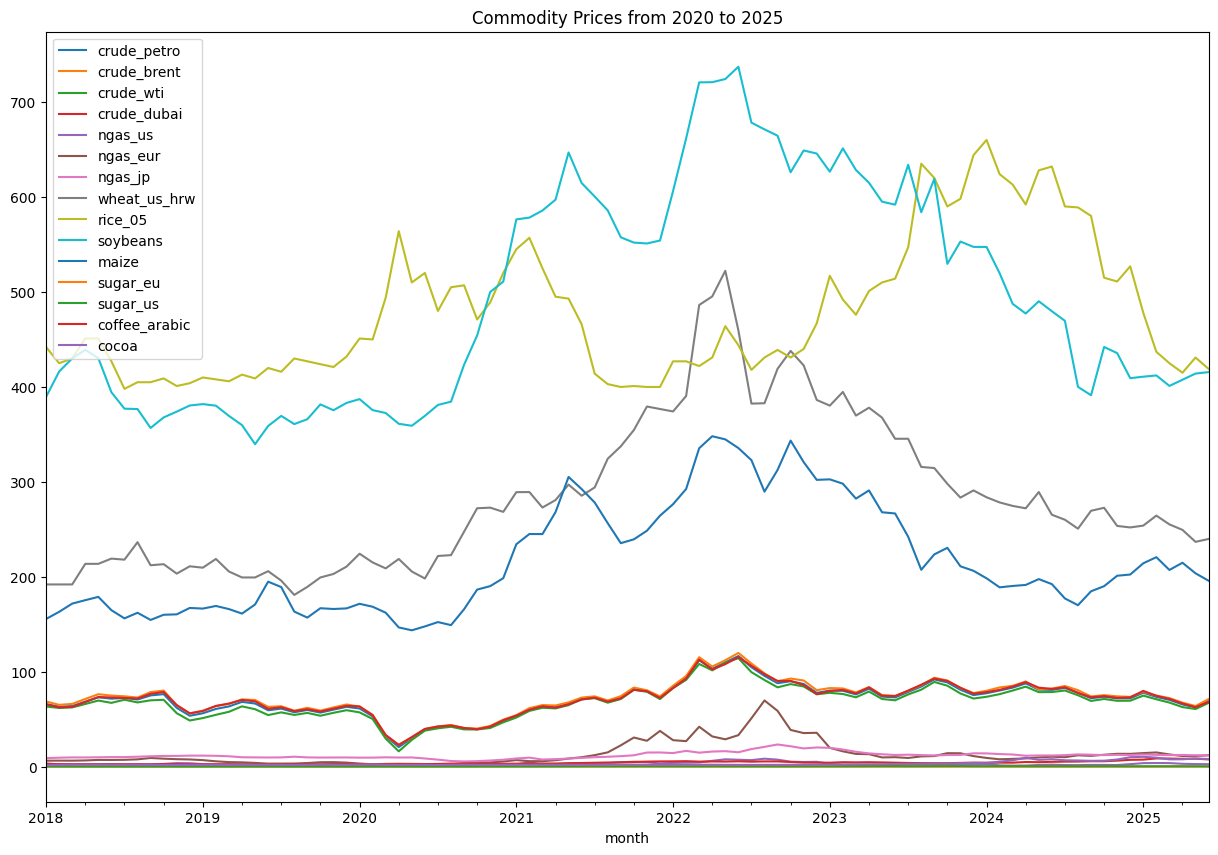

In [75]:
# Plot recent data
recent_data[cols].plot(figsize=(15, 10))
plt.title("Commodity Prices from 2020 to 2025")

In [ ]:
# We can observe the values of energy commodities and agri-commodities have very different values, will now present them separately to better visualize the trends

Text(0.5, 1.0, 'Agri Commodity Prices from 2020 to 2025')

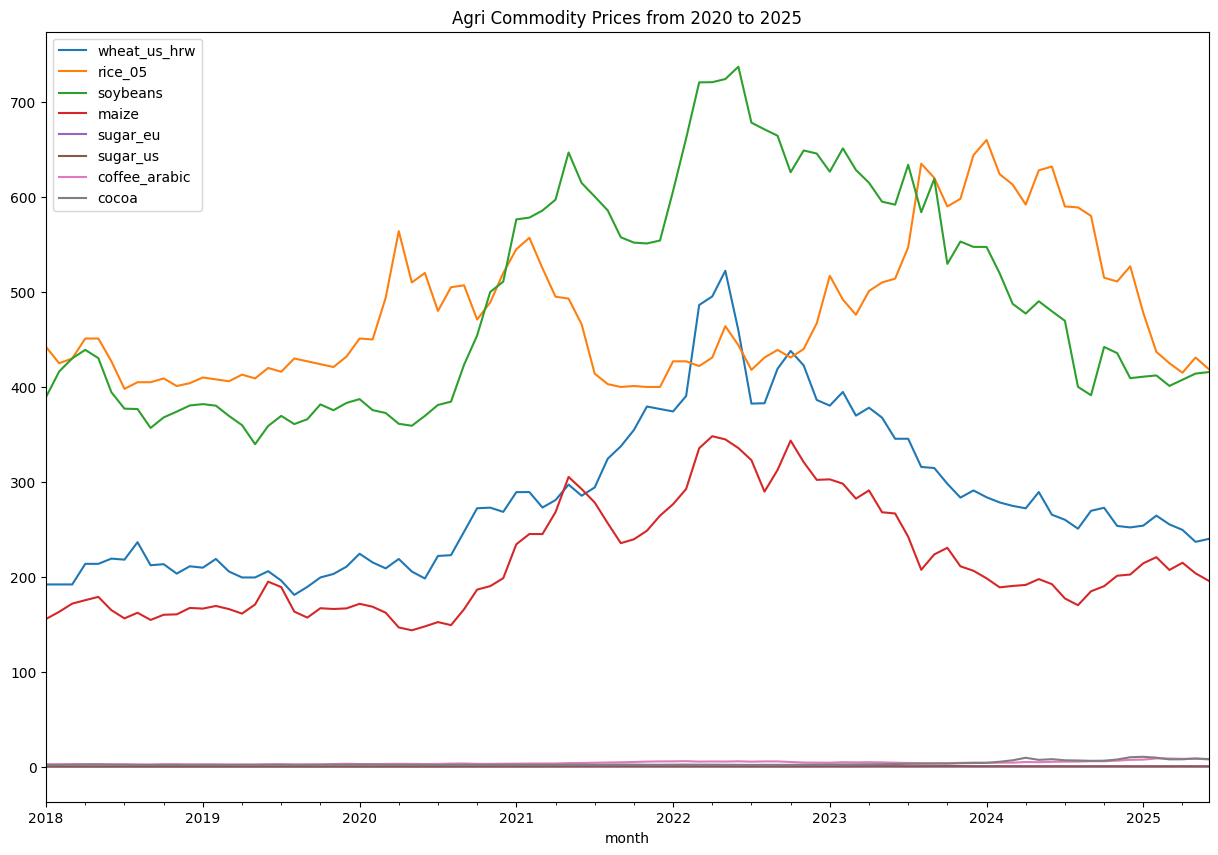

In [76]:
# Plot value of agri products
colagri = [
    "wheat_us_hrw", "rice_05", "soybeans", "maize", "sugar_eu", "sugar_us", "coffee_arabic", "cocoa"
]
recent_data[colagri].plot(figsize=(15, 10))
plt.title("Agri Commodity Prices from 2020 to 2025")

In [71]:
# NEXT STEPS:
# DEVELOP RIDGE REGRESSION MODEL WITH LAGGED VARIABLES
# DEVELOP ARIMAX MODEL
# DEVELOP SAME PROCESS FOR DIFFERENT TIMEFRAMES
# DEVELOP MORE MODELS WITH GAS AND STUDY FURTHER AS PRICES ARE MORE VOLATILE 
# CREATE A VARIABLE THAT IS THE DIFFERENCE IN PRICES BETWEEN DIFFERENT TYPES OF OIL AND GAS